In [ ]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-connector-python 3.0.3 requires cryptography<41.0.0,>=3.1.0, but you have cryptography 41.0.2 which is incompatible.
pyiceberg 0.3.0 requires requests==2.28.2, but you have requests 2.31.0 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires protobuf<4,>=3.13.0, but you have protobuf 4.21.7 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the tickers of the portfolio components
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']

# Define the weights of the portfolio components
weights = [1800, 1874, 3750, 10000, 7500]
total_investment = sum(weights)
weights = [w / total_investment for w in weights]

# Define the start and end dates
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

# Fetch the historical price data
data = yf.download(tickers, start=start_date, end=end_date)

# Use only the adjusted close prices
prices = data['Adj Close']
prices.head()

[                       0%                       ]

[*******************   40%                       ]  2 of 5 completed

[**********************60%****                   ]  3 of 5 completed

[**********************80%*************          ]  4 of 5 completed

[*********************100%***********************]  5 of 5 completed

In [ ]:
# Calculate the daily returns for each component
returns = prices.pct_change()

# Calculate the portfolio return for each day
portfolio_returns = returns.dot(weights)

# Display the first few rows of the portfolio returns
portfolio_returns.head()

In [ ]:
# Calculate the 1-day 99% VaR
var_99 = portfolio_returns.quantile(0.01)

# Convert the VaR to the amount of money at risk
var_99_money = var_99 * total_investment

var_99, var_99_money

(-0.015785389377345544, -393.43504484096036)

In [ ]:
!pip install -q matplotlib seaborn

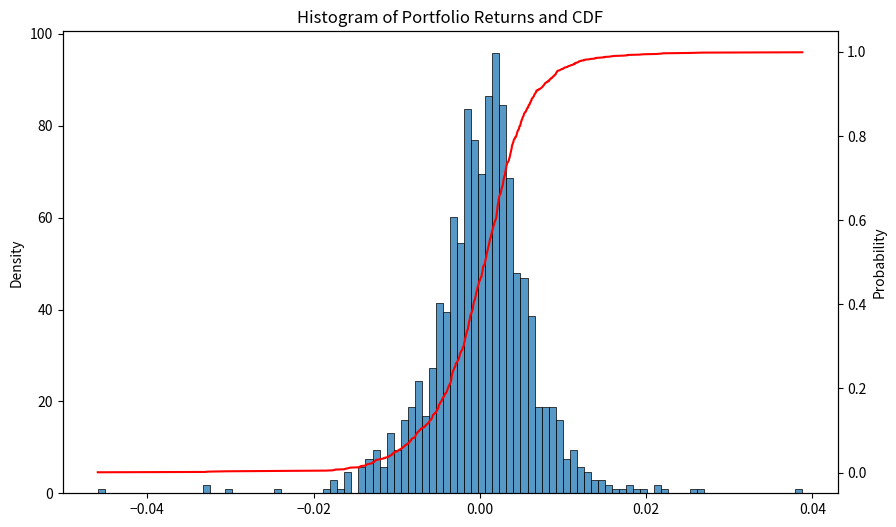

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the cumulative distribution function (CDF)
sorted_returns = portfolio_returns.sort_values()
cdf = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns)

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_returns, bins=100, kde=False, stat='density')
plt.twinx()
plt.plot(sorted_returns, cdf, color='r')
plt.title('Histogram of Portfolio Returns and CDF')
plt.xlabel('Return')
plt.ylabel('Probability')
plt.show()

In [ ]:
from scipy.optimize import minimize

def objective(weights):
    # Calculate the portfolio return for each day based on the given weights
    portfolio_returns_optimized = returns.dot(weights)
    # Calculate the VaR for the optimized portfolio
    var_99_optimized = portfolio_returns_optimized.quantile(0.01)
    var_99_money_optimized = var_99_optimized * total_investment
    # Return the absolute difference between the optimized VaR and the target VaR
    return abs(var_99_money_optimized + 1000)

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'tickers' is not defined

In [ ]:
# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'returns' is not defined

In [ ]:
# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'prices' is not defined

In [ ]:
# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'yf' is not defined

In [ ]:
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
from datetime import datetime, timedelta

# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snowflake-connector-python 3.0.3 requires cryptography<41.0.0,>=3.1.0, but you have cryptography 41.0.2 which is incompatible.
pyiceberg 0.3.0 requires requests==2.28.2, but you have requests 2.31.0 which is incompatible.
flytekit 1.2.11 requires protobuf<4,>=3.6.1, but you have protobuf 4.21.7 which is incompatible.
dagster 1.0.15 requires protobuf<4,>=3.13.0, but you have protobuf 4.21.7 which is incompatible.


In [ ]:
# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'datetime' is not defined

In [ ]:
# Import necessary libraries
from datetime import datetime, timedelta

# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

NameError: name 'yf' is not defined

In [ ]:
# Import necessary libraries
import yfinance as yf
from datetime import datetime, timedelta

# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

[                       0%                       ]

[*******************   40%                       ]  2 of 5 completed

[**********************60%****                   ]  3 of 5 completed

[**********************80%*************          ]  4 of 5 completed

[*********************100%***********************]  5 of 5 completed

NameError: name 'total_investment' is not defined

In [ ]:
# Define the total investment
total_investment = 1800 + 1874 + 3750 + 10000 + 7500

# Redefine the necessary variables
tickers = ['DBC', 'GLD', 'IEF', 'TLT', 'VTI']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(tickers, start=start_date, end=end_date)
prices = data['Adj Close']
returns = prices.pct_change().dropna()

# Constraints: sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for weights: each weight is between 0 and 1
bounds = [(0, 1) for asset in range(len(tickers))]

# Initial guess for weights
initial_weights = [1./len(tickers) for asset in tickers]

# Run the optimizer
solution = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = solution.x

optimized_weights

[                       0%                       ]

[*******************   40%                       ]  2 of 5 completed

[**********************60%****                   ]  3 of 5 completed

[**********************80%*************          ]  4 of 5 completed

[*********************100%***********************]  5 of 5 completed

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.49716501e-09,
       1.00000000e+00])

In [ ]:
# Define the deltas, gammas, and number of contracts for each option
deltas = [0.6, -0.4, 0.7]
gammas = [0.05, 0.03, 0.04]
contracts = [100, 50, 150]
# Calculate the portfolio delta and gamma
portfolio_delta = sum([delta * contract for delta, contract in zip(deltas, contracts)])
portfolio_gamma = sum([gamma * contract for gamma, contract in zip(gammas, contracts)])
portfolio_delta, portfolio_gamma

(145.0, 12.5)

In [ ]:
# Calculate the number of shares of the underlying stock needed to offset the portfolio's delta
shares_to_trade = -portfolio_delta
# Calculate the number of options contracts needed to offset the portfolio's gamma
options_to_trade = -portfolio_gamma / option_gamma
# Adjust the number of shares to trade for the gamma hedge
shares_to_trade_adjusted = shares_to_trade + options_to_trade * option_delta
shares_to_trade_adjusted, options_to_trade

NameError: name 'option_gamma' is not defined

In [ ]:
# Define the delta and gamma of the available option on the power stock
option_delta = 0.5
option_gamma = 0.05
# Calculate the number of shares of the underlying stock needed to offset the portfolio's delta
shares_to_trade = -portfolio_delta
# Calculate the number of options contracts needed to offset the portfolio's gamma
options_to_trade = -portfolio_gamma / option_gamma
# Adjust the number of shares to trade for the gamma hedge
shares_to_trade_adjusted = shares_to_trade + options_to_trade * option_delta
shares_to_trade_adjusted, options_to_trade

(-270.0, -250.0)

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        if total_delta > 0:
            return f"You need to short {total_delta} shares of the underlying to hedge the portfolio."
        elif total_delta < 0:
            return f"You need to buy {-total_delta} shares of the underlying to hedge the portfolio."
        else:
            return "Your portfolio is already delta neutral."

# Test the Portfolio class
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6)
portfolio.add_position('MSFT', 50, 250, 0.5)
hedge_message = portfolio.calculate_hedge()
hedge_message

'You need to short 85.0 shares of the underlying to hedge the portfolio.'

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0):
        # Gamma is set to 0 by default since stocks don't have gamma
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])

        # Delta hedge using underlying stock
        shares_to_trade = -total_delta

        # Gamma hedge using options
        # Assuming we have an option available with a delta of 0.5 and gamma of 0.05
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma

        # Adjust the number of shares to trade for the gamma hedge
        shares_to_trade += options_to_trade * option_delta

        return shares_to_trade, options_to_trade

# Test the Portfolio class with both delta and gamma hedging
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04)
shares_to_trade, options_to_trade = portfolio.calculate_hedge()
shares_to_trade, options_to_trade

(-155.0, -140.0)

In [ ]:
# Perform the suggested delta hedge by shorting 155 shares of the underlying
portfolio.add_position('Underlying', -155, 100, 1)  # Assuming a generic 'Underlying' with price $100 and delta of 1 for simplicity

# Calculate the new hedge requirements
new_shares_to_trade, new_options_to_trade = portfolio.calculate_hedge()
new_shares_to_trade, new_options_to_trade

(0.0, -140.0)

In [ ]:
# Perform the suggested gamma hedge by shorting 140 options contracts
# Assuming a generic 'Option' with price $10, delta of 0.5, and gamma of 0.05 for simplicity
portfolio.add_position('Option', -140, 10, 0.5, 0.05)

# Calculate the new hedge requirements after performing both delta and gamma hedges
final_shares_to_trade, final_options_to_trade = portfolio.calculate_hedge()
final_shares_to_trade, final_options_to_trade

(140.0, -0.0)

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0):
        # Gamma is set to 0 by default since stocks don't have gamma
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])

        # Gamma hedge using options
        # Assuming we have an option available with a delta of 0.5 and gamma of 0.05
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma

        # Adjust the number of shares to trade for both the original delta and the new delta introduced by the gamma hedge
        shares_to_trade = -total_delta + options_to_trade * option_delta

        return shares_to_trade, options_to_trade

# Test the Portfolio class with combined delta and gamma hedging
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04)
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
combined_shares_to_trade, combined_options_to_trade

(-155.0, -140.0)

In [ ]:
Portfolio??

Init signature: Portfolio()
Docstring:      <no docstring>
Type:           type
Subclasses:     

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04)
portfolio_contents = portfolio.view_portfolio()
portfolio_contents

{'AAPL': {'size': 100, 'price': 150, 'delta': 0.6, 'gamma': 0.05},
 'MSFT': {'size': 50, 'price': 250, 'delta': 0.5, 'gamma': 0.04}}

In [ ]:
import numpy as np

class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        iteration = 0
        max_iterations = 100
        while VaR > target_VaR and iteration < max_iterations:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))
            iteration += 1

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=10000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices']:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))
        print(f'Initial VaR: {VaR}')

        # Adjust portfolio to meet target VaR
        # This is a simplified approach; in practice, more sophisticated methods might be used
        iteration = 0
        max_iterations = 100
        while VaR > target_VaR and iteration < max_iterations:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices']:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))
            print(f'Adjusted VaR after iteration {iteration}: {VaR}')
            iteration += 1

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Test the updated Portfolio class with VaR constraint
portfolio = Portfolio()
portfolio.add_position('AAPL', 100, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('MSFT', 50, 250, 0.5, 0.04, historical_prices=np.random.rand(100) * 250)
VaR = portfolio.calculate_VaR()
combined_shares_to_trade, combined_options_to_trade = portfolio.calculate_hedge()
VaR, combined_shares_to_trade, combined_options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Clear the portfolio
portfolio.positions.clear()
portfolio.view_portfolio()

{}

In [ ]:
# Add positions to the portfolio
portfolio.add_position('TLT', 40000000, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('IEF', 15000000, 120, 0.5, 0.04, historical_prices=np.random.rand(100) * 120)
portfolio.add_position('DBC', 7500000, 18, 0.55, 0.045, historical_prices=np.random.rand(100) * 18)
portfolio.add_position('GLD', 7500000, 170, 0.58, 0.048, historical_prices=np.random.rand(100) * 170)
portfolio.add_position('VTI', 30000000, 220, 0.62, 0.052, historical_prices=np.random.rand(100) * 220)

# Calculate VaR and hedge recommendations
VaR = portfolio.calculate_VaR(target_VaR=1000000)
shares_to_trade, options_to_trade = portfolio.calculate_hedge()
VaR, shares_to_trade, options_to_trade

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
class Portfolio:
    def __init__(self):
        self.positions = {}

    def add_position(self, ticker, size, price, delta, gamma=0, historical_prices=None):
        self.positions[ticker] = {'size': size, 'price': price, 'delta': delta, 'gamma': gamma, 'historical_prices': historical_prices}

    def remove_position(self, ticker):
        if ticker in self.positions:
            del self.positions[ticker]
        else:
            print(f"{ticker} not found in the portfolio.")

    def calculate_VaR(self, confidence_level=0.99, target_VaR=1000000):
        # Using historical simulation method for VaR
        portfolio_returns = []
        for position in self.positions.values():
            if position['historical_prices'] is not None:
                daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                weighted_returns = daily_returns * position['size']
                portfolio_returns.append(weighted_returns)

        portfolio_returns = np.sum(portfolio_returns, axis=0)
        VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        # Adjust portfolio to meet target VaR
        while VaR > target_VaR:
            # Reduce the largest position by 10% as a simple adjustment
            largest_position = max(self.positions.keys(), key=lambda x: self.positions[x]['size'])
            self.positions[largest_position]['size'] *= 0.9
            # Recalculate VaR after adjustment
            portfolio_returns = []
            for position in self.positions.values():
                if position['historical_prices'] is not None:
                    daily_returns = np.diff(position['historical_prices']) / position['historical_prices'][:-1]
                    weighted_returns = daily_returns * position['size']
                    portfolio_returns.append(weighted_returns)
            portfolio_returns = np.sum(portfolio_returns, axis=0)
            VaR = -np.percentile(portfolio_returns, 100 - (confidence_level * 100))

        return VaR

    def calculate_hedge(self):
        total_delta = sum([position['size'] * position['delta'] for position in self.positions.values()])
        total_gamma = sum([position['size'] * position['gamma'] for position in self.positions.values()])
        option_delta = 0.5
        option_gamma = 0.05
        options_to_trade = -total_gamma / option_gamma
        shares_to_trade = -total_delta + options_to_trade * option_delta
        return shares_to_trade, options_to_trade

    def view_portfolio(self):
        return self.positions

# Add positions to the portfolio
portfolio = Portfolio()
portfolio.add_position('TLT', 40000000, 150, 0.6, 0.05, historical_prices=np.random.rand(100) * 150)
portfolio.add_position('IEF', 15000000, 120, 0.5, 0.04, historical_prices=np.random.rand(100) * 120)
portfolio.add_position('DBC', 7500000, 18, 0.55, 0.045, historical_prices=np.random.rand(100) * 18)
portfolio.add_position('GLD', 7500000, 170, 0.58, 0.048, historical_prices=np.random.rand(100) * 170)
portfolio.add_position('VTI', 30000000, 220, 0.62, 0.052, historical_prices=np.random.rand(100) * 220)

# Calculate VaR and hedge recommendations
VaR = portfolio.calculate_VaR(target_VaR=1000000)
shares_to_trade, options_to_trade = portfolio.calculate_hedge()
VaR, shares_to_trade, options_to_trade

(996399.8810381495, -1749066.7266669963, -1580917.1481485602)

In [ ]:
# Add the hedge recommendations to the portfolio
# Assuming 'Shares' and 'Options' as generic tickers for the hedging instruments
portfolio.add_position('Shares', shares_to_trade, 1, 1)  # Assuming price of 1 and delta of 1 for shares
portfolio.add_position('Options', options_to_trade, 1, 0.5, 0.05)  # Assuming price of 1, delta of 0.5, and gamma of 0.05 for options

# Recalculate VaR and hedge recommendations after adding the hedges
VaR = portfolio.calculate_VaR(target_VaR=1000000)
shares_to_trade, options_to_trade = portfolio.calculate_hedge()
VaR, shares_to_trade, options_to_trade

(996399.8810381495, 1580917.14814856, -0.0)

In [ ]:
portfolio.view_portfolio()

{'TLT': {'size': 349118.5427235088,
  'price': 150,
  'delta': 0.6,
  'gamma': 0.05,
  'historical_prices': array([129.04170049, 128.09627995,  64.7130693 ,   1.29646311,
          77.71821395,  98.29117101,  75.43308798,  13.32710794,
          28.05351404, 123.49614754,  92.69480451,  93.77148447,
          25.92059716,  77.22359259, 110.89503991,   6.61048002,
          96.81246712,  29.04405571,  88.84951314,  14.44864499,
          16.96347397,  31.08176765,  81.22710295,  74.18397552,
          58.68310332, 108.00519342,  18.23244147, 131.52149256,
          83.00335864,  41.05303881, 144.98554635,  28.03455477,
         139.37625762,  20.77631537, 129.50236321,   9.17438922,
          87.82591917,  68.69309782,  18.58936881,  15.03557835,
         120.05189596,  21.43393834,  11.03265526,  87.12053078,
          99.4155656 ,  59.59421154, 125.70149226,  30.78770957,
          98.35092541, 122.6952952 ,   5.31648128, 130.44646439,
          14.07402311,  42.79869338,  46.99011199